In [1]:
import datetime as dt

import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import pandas as pd

In [2]:
# data
confirmed_cases = np.loadtxt('../data/confirmed_cases.dat')
recovered_cases = np.loadtxt('../data/recovered_cases.dat')
death_cases = np.loadtxt('../data/death_cases.dat')

epidemics_start_date = dt.datetime(2020, 2, 26)
date_list = [epidemics_start_date + dt.timedelta(days=i) for i in range(confirmed_cases.size)]

# dataframe
df = pd.DataFrame({
    'date': date_list,
    'confirmed_cases': confirmed_cases,
    'recovered_cases': recovered_cases,
    'death_cases': death_cases,
})
print(df)

          date  confirmed_cases  recovered_cases  death_cases
0   2020-02-26              1.0              0.0          0.0
1   2020-02-27              3.0              0.0          0.0
2   2020-02-28              3.0              0.0          0.0
3   2020-02-29              5.0              0.0          0.0
4   2020-03-01              6.0              0.0          0.0
..         ...              ...              ...          ...
168 2020-08-12           5740.0           4962.0        160.0
169 2020-08-13           5870.0           5024.0        160.0
170 2020-08-14           6050.0           5078.0        161.0
171 2020-08-15           6258.0           5134.0        163.0
172 2020-08-16           6420.0           5193.0        165.0

[173 rows x 4 columns]


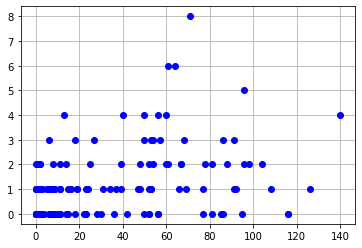

In [3]:
plt.plot(np.diff(df.confirmed_cases)[:-22], np.diff(df.death_cases)[22:], 'bo')
plt.grid()
plt.show()